## Segment a sparse 3D image with a single material component  

The goal of this notebook is to develop a 3D segmentation algorithm that improves segmentation where features are detected.

**Data:** AM parts from Xuan Zhang. 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tomo2mesh.misc import viewer
from tomo2mesh import DataFile
from skimage.filters import threshold_otsu
from tomo2mesh import Voids
import os
from tomo2mesh.projects.steel_am.rw_utils import *

In [2]:
b = 4
voids_coarse = Voids().import_from_disk(os.path.join(voids_dir,f"voids_2k_b_{b}"))
voids_fine = Voids().import_from_disk(os.path.join(voids_dir,f"voids_2k_b_{b}_subset"))

In [3]:
Vx = DataFile('/data02/MyArchive/tomo_datasets/data_porosity_mapping_paper/full_rec/2k_rec', tiff = True).read_full()


##################################################
Found existing tiff folder: 2k_rec
Dataset shape: (2048, 2048, 2048)


In [4]:
assert len(voids_fine) == len(voids_coarse)

In [5]:
len(voids_fine)

39211

In [6]:
def plot_void_coarse2fine(voids_coarse, voids_fine, Vx, ax, ii):
    b = voids_coarse.b
    imp = viewer.get_orthoplanes(vol = voids_coarse["x_voids"][ii])
    imx = viewer.get_orthoplanes(vol = Vx[::b,::b,::b][voids_coarse["s_voids"][ii]])
    for i3 in range(3):
        viewer.edge_plot(imx[i3], imp[i3], ax[0,i3], color = [255,0,0])

    imp = viewer.get_orthoplanes(vol = voids_fine["x_voids"][ii])
    imx = viewer.get_orthoplanes(vol = Vx[voids_fine["s_voids"][ii]])
    for i3 in range(3):
        viewer.edge_plot(imx[i3], imp[i3], ax[1,i3], color = [255,0,0])        
    
    

#     for ax_flat in ax.flat:
#         ax_flat.axis('off')
    ax[0,1].set_title(f"void id = {ii}", fontsize = 14, fontweight = "bold")
#     size = {voids_fine['sizes'][ii]} voxels
    fig.tight_layout()
    return

In [7]:
# search ids
# vis: 1412, 46, 2426, 417
# plots: 1822, 2563, 1734, 747, 1934, 1412, 417

In [12]:
idxs = np.argsort(voids_fine["sizes"])

In [20]:
# id_list = [1822, 2563, 1734, 747, 1934, 1412, 417]
id_list = [15325]
# id_list = [1822, 2563, 1734, 747, 1934, 1412, 417, 23931, 14678, 31299]

In [21]:
idxs[100]

15325

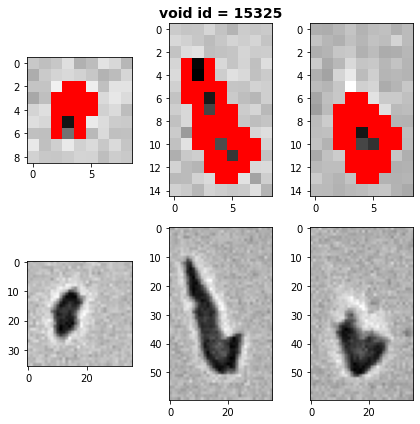

In [22]:
for id_val in id_list:
    fig, ax = plt.subplots(2,3, figsize = (6,6))
    plot_void_coarse2fine(voids_coarse,voids_fine,Vx,ax,id_val)

In [69]:
10.38+23.2+176+30.4

239.98

In [70]:
456/240

1.9